In [1]:
import numpy as np
from multi_step import multi_step, utils
import gpflow
import tensorflow as tf
import matplotlib.pyplot as plt
gpflow.config.set_default_float("float32")

Setting the default backend to "tensorflow". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)


Using backend: tensorflow


In [2]:
# class multi_step_minimal()

In [3]:
#Schaffer Function 1
class SchafferFunc1():
    def __init__(self):
        self.name = 'SchafferFunc1'

    def evaluateModel(self, input):
        # print('input: ',input)
        return tf.squeeze(input)

SFunc = SchafferFunc1()

In [4]:
# Define the stage input ranges
stage1Ranges = [[-10,10]]

In [5]:
# Generate the multi_step class
multi_step_graph = multi_step.multi_step_graph('adagrad', learning_rate=0.05, training='sobol', eps=1e-4)

In [6]:
# Load the models into the framework

#Define the stages
# stageID, stageModel, conditionRanges, followingStages (followingStageID, feedingVariables)
stage1 = utils.stage(0, SFunc, stage1Ranges, outputDimension=1)

stages = [stage1]

multi_step_graph.loadModels(stages)

c:\users\geeso\virtualenvironments\multi-step-framework\lib\site-packages\dgl\base.py:45: DGLWarning: Recommend creating graphs by `dgl.graph(data)` instead of `dgl.DGLGraph(data)`.
  return warnings.warn(message, category=category, stacklevel=1)


In [7]:
# Define the objective functions

def objectiveFunction1(var1):
    return -var1**2

def objectiveFunction2(var1):
    return -(var1-2)**2

# Define the objective objects including the objective functions and the IDs of relevant variables/outputs
# Define objective variables with form: [stage, 'input'/'output', stage variable]
objective1 = utils.objective(objectiveFunction2, [[stage1,'outputs',0]])
objective2 = utils.objective(objectiveFunction1, [[stage1,'outputs',0]])

objectives = [objective1, objective2]

In [8]:
# Define the objectives for the framework
multi_step_graph.defineObjectives(objectives)

In [9]:
# Train
# numObjectiveSamples, numStartSamples, preferenceCodeDim, hyperparameterGeneratorDim, epochs=5, h_dim=5, n_layers=4, network_type='GATConv', **kwargs
# inputs = multi_step_graph.train(10, 20, 350, epochs=20, h_dim=20, n_layers=4, network_type='GATConv', num_heads=4)
inputs, losses = multi_step_graph.train(5, 5, 5, 15, epochs=20, h_dim=3, n_layers=3, network_type='GATConv', num_heads=1)#, activation=tf.keras.activations.tanh)

Starting training
Inputs:  [{0: array([7.5])}, {0: array([-2.5])}, {0: array([-5.])}, {0: array([5.])}, {0: array([0.])}]
dict: gat_conv, [<tf.Variable 'Variable:0' shape=(1, 1, 4) dtype=float32, numpy=
array([[[ 1.3872156 , -0.5082911 ,  0.669307  ,  0.13189562]]],
      dtype=float32)>, <tf.Variable 'Variable:0' shape=(1, 1, 4) dtype=float32, numpy=
array([[[-0.25252393, -1.1763684 , -0.6777084 ,  0.597734  ]]],
      dtype=float32)>, <tf.Variable 'gat_conv/dense_4/kernel:0' shape=(4, 4) dtype=float32, numpy=
array([[ 1.016957  , -0.9549548 ,  0.6586365 , -1.33839   ],
       [ 0.33956528,  0.2931005 ,  0.041669  ,  0.38530996],
       [ 0.13121538,  0.11465744,  1.033926  ,  0.5135701 ],
       [ 0.2576551 , -0.40558952,  0.6287094 , -0.63657635]],
      dtype=float32)>] 
dict: gat_conv_1, [<tf.Variable 'Variable:0' shape=(1, 1, 4) dtype=float32, numpy=
array([[[-0.8363781 ,  0.00233788,  0.14588039, -1.3769271 ]]],
      dtype=float32)>, <tf.Variable 'Variable:0' shape=(1, 1, 4) dt

c:\users\geeso\virtualenvironments\multi-step-framework\lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:167: UserWarning: You are solving a parameterized problem that is not DPP. Because the problem is not DPP, subsequent solves will not be faster than the first one. For more information, see the documentation on Discplined Parametrized Programming, at
	https://www.cvxpy.org/tutorial/advanced/index.html#disciplined-parametrized-programming
  warnings.warn(dpp_error_msg)


Weightings: [0.1 0.9], Epoch: 5, Loss: 1.5050773620605469, Objective values: [-2.242371  -0.2525516]
Weightings: [0.1 0.9], Epoch: 10, Loss: 1.5050773620605469, Objective values: [-2.242371  -0.2525516]
Weightings: [0.1 0.9], Epoch: 15, Loss: 1.5050773620605469, Objective values: [-2.242371  -0.2525516]
Weightings: [0.1 0.9], Epoch: 0, Loss: 1.9378328323364258, Objective values: [-2.954154   -0.07909296]
Weightings: [0.1 0.9], Epoch: 5, Loss: 1.5120224952697754, Objective values: [-2.2786734  -0.24056324]
Weightings: [0.1 0.9], Epoch: 10, Loss: 1.4902853965759277, Objective values: [-2.2645252  -0.24518943]
Weightings: [0.1 0.9], Epoch: 15, Loss: 1.4902853965759277, Objective values: [-2.2645252  -0.24518943]
Weightings: [0.1 0.9], Epoch: 0, Loss: 1.8980764150619507, Objective values: [-2.8804505 -0.0916945]
Weightings: [0.1 0.9], Epoch: 5, Loss: 1.5526046752929688, Objective values: [-2.361479   -0.21463713]
Weightings: [0.1 0.9], Epoch: 10, Loss: 1.5086827278137207, Objective values:

In [10]:
# Get optimised inputs based on desired objective weightings
generatedInputs, objectiveValues = multi_step_graph.getConditions([0.5,0.5])
print(generatedInputs)
print(objectiveValues)

tf.Tensor([-3.4776282], shape=(1,), dtype=float32)
[<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.6357889], dtype=float32)>]
[-0.13264972 -2.6758053 ]


In [11]:
# Create plot of objectives with different weightings
weightings = np.arange(0.2,0.8,0.05)
inputsList = []
objectiveValuesList = []
for weighting in weightings:
    generatedInputs, objectiveValues = multi_step_graph.getConditions([weighting,1-weighting])
    inputsList.append(generatedInputs)
    objectiveValuesList.append(objectiveValues)
inputsArray = np.squeeze(np.array(inputsList))
objectiveValuesArray = np.squeeze(np.array(objectiveValuesList))

print(inputsArray)
print(objectiveValuesArray)

tf.Tensor([7.239912], shape=(1,), dtype=float32)
tf.Tensor([2.6459932], shape=(1,), dtype=float32)
tf.Tensor([-6.2596297], shape=(1,), dtype=float32)
tf.Tensor([9.064741], shape=(1,), dtype=float32)
tf.Tensor([-3.3746648], shape=(1,), dtype=float32)
tf.Tensor([-7.9537582], shape=(1,), dtype=float32)
tf.Tensor([4.8239975], shape=(1,), dtype=float32)
tf.Tensor([4.3769407], shape=(1,), dtype=float32)
tf.Tensor([0.37567616], shape=(1,), dtype=float32)
tf.Tensor([-0.01195908], shape=(1,), dtype=float32)
tf.Tensor([-6.466565], shape=(1,), dtype=float32)
tf.Tensor([-1.9527225], shape=(1,), dtype=float32)
tf.Tensor([2.4748917], shape=(1,), dtype=float32)
[1.9576793 1.5152335 2.084038  2.2275453 1.6446424 2.3591204 1.5935209
 1.5637817 1.4918208 1.4943895 1.8622375 1.537016  1.5014293]
[[-1.7910440e-03 -3.8325081e+00]
 [-2.3499854e-01 -2.2959325e+00]
 [-7.0623886e-03 -4.3432145e+00]
 [-5.1776845e-02 -4.9619579e+00]
 [-1.2627906e-01 -2.7048485e+00]
 [-1.2896743e-01 -5.5654488e+00]
 [-1.6522528e-

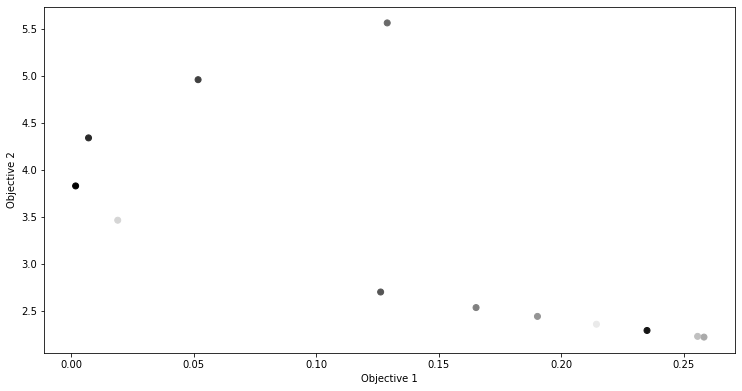

In [12]:
pareto = plt.figure(figsize=(12, 6))
ax = pareto.add_axes([0.1, 0.1, 0.8, 0.8])
ax.scatter(objectiveValuesArray[:,0]*(-1),objectiveValuesArray[:,1]*(-1), c=weightings, cmap='gray')
# ax.set_xscale('log')
ax.set_xlabel('Objective 1')
ax.set_ylabel('Objective 2')
pareto.savefig('././figures/pareto_Pareto_test.pdf')

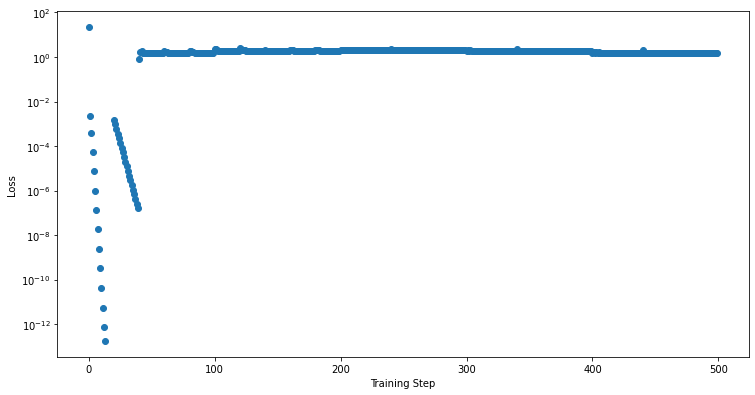

In [13]:
loss_fig = plt.figure(figsize=(12, 6))
ax = loss_fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.scatter(range(len(losses)),losses)
ax.set_yscale('log')
ax.set_xlabel('Training Step')
ax.set_ylabel('Loss')
loss_fig.savefig('././figures/losses.pdf')

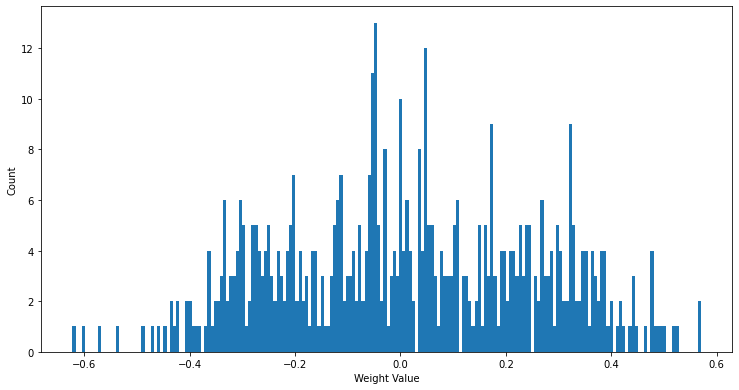

In [14]:
weights = multi_step_graph.multiHyperNet.trainable_weights
weightsArray = np.concatenate([weight.numpy().flatten() for weight in weights],axis=0)
weight_fig = plt.figure(figsize=(12, 6))
ax = weight_fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.hist(weightsArray, bins=200)
# ax.scatter(range(len(losses)),losses)
# ax.set_yscale('log')
ax.set_xlabel('Weight Value')
ax.set_ylabel('Count')
weight_fig.savefig('././figures/weights.pdf')

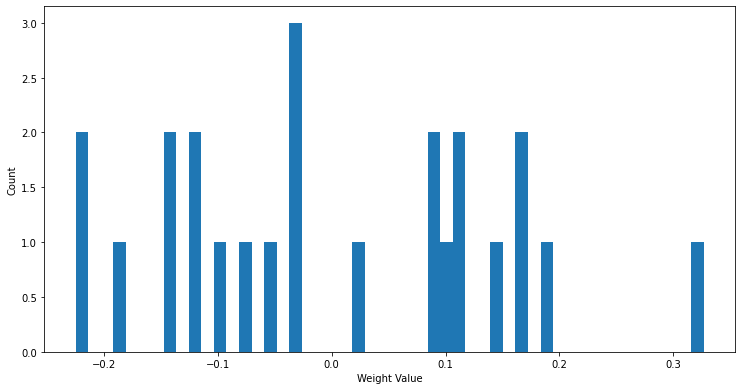

In [15]:
weights = [multi_step_graph.multiNet.layers[0].attn_l,multi_step_graph.multiNet.layers[0].attn_r,multi_step_graph.multiNet.layers[0].fc.kernel]
weightsArray = np.concatenate([weight.numpy().flatten() for weight in weights],axis=0)
weightNet_fig = plt.figure(figsize=(12, 6))
ax = weightNet_fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.hist(weightsArray, bins=50)
# ax.scatter(range(len(losses)),losses)
# ax.set_yscale('log')
ax.set_xlabel('Weight Value')
ax.set_ylabel('Count')
weightNet_fig.savefig('././figures/main_net_weights.pdf')